In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

**Сценарий:** Представьте, что вы работаете в розничной компании, которая недавно запустила программу лояльности. Компания хочет оценить влияние программы на расходы клиентов. Программа лояльности была развернута в выбранных магазинах (экспериментальная группа), в то время как другие магазины продолжили работу без нее (контрольная группа). У нас есть данные о расходах клиентов до и после запуска программы, и мы хотим оценить, привела ли программа к увеличению выручки, контролируя другие факторы, такие как возраст клиентов и средний доход в месте расположения магазина.

#### Задание 1
Для вас подготовлен csv файл под названием DID_test.csv.<br>
В данном датасете есть следющие колонки:
* Новый_Маркетинг - флаг, обозначающий проходила ли программа лояльности в данном магазине
* После_Обновления - флаг, обозначающий время замера показателей после или до проведения программы лояльности
* Возраст_Посетителей - средний возраст посетитиелей магазина
* Доход_Посетителей - средний годовой доход посетителей магазина в год
* Выручка_Магазина - выручка магазина за месяц в долларах

Вам необходимо, используя библиотке stasmodels, провести линейную регрессию для прогноза Выручки_Магазина

In [2]:
# Загрузка данных
file_path = 'DID_test.csv'
data = pd.read_csv(file_path)

# Подготовка данных
# Независимые переменные (предикторы)
X = data[['Новый_Маркетинг', 'После_Обновления', 'Возраст_Посетителей', 'Доход_Посетителей']]
# Константа (интерсепт) для модели
X = sm.add_constant(X)
# Зависимая переменнуая (целевая переменная)
y = data['Выручка_Магазина']

# Построение модели линейной регрессии
model = sm.OLS(y, X).fit()

# Оценка результатов модели
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Выручка_Магазина   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     86.63
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           3.57e-42
Time:                        10:12:23   Log-Likelihood:                -923.84
No. Observations:                 200   AIC:                             1858.
Df Residuals:                     195   BIC:                             1874.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 201.2975    

#### Задание 2
Интерпретируйте полученные результаты

> **R-squared = 0.640** значит, что 64% изменений в выручке магазина можно объяснить нашей моделью. Оставшиеся 36% обусловлены другими факторами, не учтенными в модели.

> **const (интерсепт) = 201.2975** значит, что если не учитывать ни одну из переменных, средняя выручка магазина составит примерно $201.30 в месяц.

> **Новый_Маркетинг = 15.1933** значит, что если магазин участвовал в новой маркетинговой программе, его выручка увеличивается в среднем на $15.19 в месяц.

> **После_Обновления = 33.9687** значит, что если измерения проводились после обновления программы лояльности, выручка магазина увеличивается в среднем на $33.97 в месяц.

> **Возраст_Посетителей = 1.5718** значит, что с увеличением среднего возраста посетителей на один год, выручка магазина увеличивается в среднем на $1.57 в месяц.

> **Доход_Посетителей = 0.0008** значит, что с увеличением среднего годового дохода посетителей на \$1, выручка магазина увеличивается в среднем на $0.0008 в месяц.



> Модель линейной регрессии показывает, что новые маркетинговые программы и обновления программ лояльности действительно помогают увеличивать выручку магазина. Также важно учитывать возраст и доход посетителей, так как они тоже оказывают влияние на выручку.



#### Задание 3
Добавьте новую колонку под названием *intersection* которая будет перемножением колонок Новый_Маркетинг и После_Обновления<br>
Данная колонка будет служить признаком для Difference-In-Difference анализа<br>
Постройте линейную регрессую с учетом нового признака

In [3]:
# Создание новой колонки
data['intersection'] = data['Новый_Маркетинг'] * data['После_Обновления']

# Подготовка данных
# Независимые переменные (предикторы)
X = data[['Новый_Маркетинг', 'После_Обновления', 'Возраст_Посетителей', 'Доход_Посетителей', 'intersection']]
# Константа (интерсепт) для модели
X = sm.add_constant(X)
# Зависимая переменная (целевая переменная)
y = data['Выручка_Магазина']

# Построение модели линейной регрессии
model = sm.OLS(y, X).fit()

# Оценка результатов модели
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Выручка_Магазина   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     75.71
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           1.02e-43
Time:                        10:12:23   Log-Likelihood:                -917.75
No. Observations:                 200   AIC:                             1847.
Df Residuals:                     194   BIC:                             1867.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 211.7953    

#### Задание 4
Интерпретируйте новые результаты

> **R-squared = 0.661** значит, что 66.1% изменений в выручке магазина можно объяснить переменными.

> **const (интерсепт) = 211.80** значит, что если не учитывать ни одну из переменных, средняя выручка магазина составит примерно $211.80 в месяц.

> **Новый_Маркетинг = 3.12** значит, что участие в новой маркетинговой программе само по себе не оказывает значимого влияния на выручку, так как p-значение больше 0.05.

> **После_Обновления = 22.07** значит, что измерения после обновления программы лояльности приводят к увеличению выручки магазина в среднем на $22.07 в месяц. Это значение значимо, так как p-значение меньше 0.05.

> **Возраст_Посетителей = 1.54** значит, что с увеличением среднего возраста посетителей на один год, выручка магазина увеличивается в среднем на $1.54 в месяц. Это значение значимо.

> **Доход_Посетителей = 0.0007** значит, что с увеличением среднего годового дохода посетителей на $1, выручка магазина увеличивается в среднем на $0.0007 в месяц. Это значение значимо.

> **intersection = 24.10** значит, что когда и новая маркетинговая кампания, и обновление программы лояльности проведены, выручка магазина увеличивается в среднем на $24.10 в месяц. Это значение значимо, так как p-значение меньше 0.05.



1. Маркетинговая программа сама по себе не оказывает значительного влияния на выручку.
2. Обновление программы лояльности значимо увеличивает выручку.
3. Возраст и доход посетителей также значимо влияют на выручку.
4. Наибольшее влияние оказывается, когда и маркетинговая программа, и обновление программы лояльности проводятся вместе, что значительно увеличивает выручку.

#### Задание 5
Нарисуйте график, показывающий динамику изменений средней выручки между экспериментальной и контрольной группами, до и после кампании

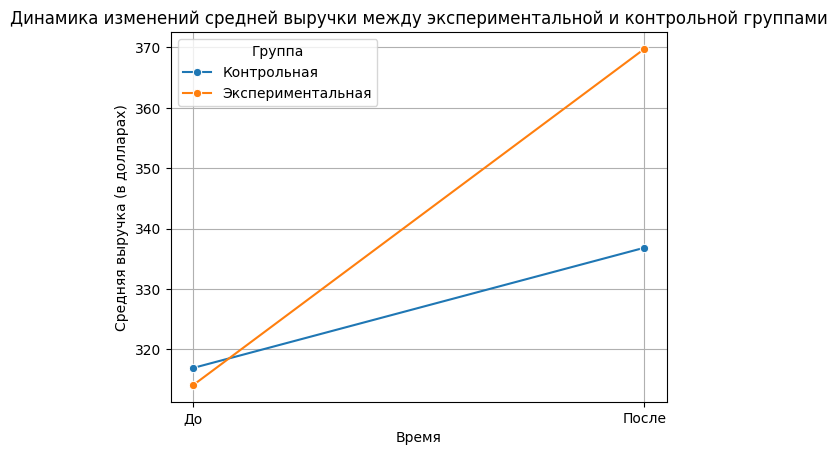

In [4]:
# Создание группы данных
data['Группа'] = data['Новый_Маркетинг'].apply(lambda x: 'Экспериментальная' if x == 1 else 'Контрольная')

# Создание колонки 'Группа'
group_labels = []
for value in data['Новый_Маркетинг']:
    if value == 1:
        group_labels.append('Экспериментальная')
    else:
        group_labels.append('Контрольная')
data['Группа'] = group_labels

# Создание колонки 'Время'
time_labels = []
for value in data['После_Обновления']:
    if value == 1:
        time_labels.append('После')
    else:
        time_labels.append('До')
data['Время'] = time_labels

# Вычисление средней выручки для каждой группы и времени
mean_revenue = data.groupby(['Группа', 'Время'])['Выручка_Магазина'].mean().reset_index()

# Построение графика
sns.lineplot(x='Время', y='Выручка_Магазина', hue='Группа', data=mean_revenue, marker='o')

# Настройка графика
plt.title('Динамика изменений средней выручки между экспериментальной и контрольной группами')
plt.xlabel('Время')
plt.ylabel('Средняя выручка (в долларах)')
plt.legend(title='Группа')
plt.grid(True)
plt.show()